![license_header_logo](../../../images/license_header_logo.png)

> **Copyright (c) 2021 CertifAI Sdn. Bhd.**<br>
<br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

# Introduction

This handson is to get use to some of the evaluation metrics. You build a model, get feedback from metrics, make improvements and continue until you achieve a desirable accuracy. Evaluation metrics explain the performance of a model.

# What we will accomplish?

1. Understand some of the evaluation metrics model
2. Able to implement these evaluation metrics in your own model

# Instructions
Read the code and execute them according to the instructions provided. Begin with the problem statement and follow the steps.

# Problem Statement:
We have a classification model that predicts whether an image is a cat or a dog. Based on this dataset, we have trained the model and set it for a test run. After the test run, we have these following results:

Correctly predicted dogs = 846
Correctly predicted cats = 732

Images of dogs = 1000
Images of cats = 1000

# Step 1: Accuracy
You are required to calculate the accuracy of the model based on the information given in the problem statement.

1) Accuracy of the model predicting a dog
2) Accuracy of the model predicting a cat
3) Overall accurary of the model

Write a program that will print out the accurary metric listed above.

In [6]:
# write your program here

dog_correct_count = 846
cat_correct_count = 732

dog_total_count = 1000
cat_total_count = 1000

# 1) Accuracy of the model predicting a dog



# 2) Accuracy of the model predicting a cat



# 3) Overall accurary of the model




# Step 2: Precision
Calculate the precision of this model.
Write a program that will print out the precision of this model.

In [7]:
# write your program here

dog_correct_count = 846
cat_correct_count = 732

dog_total_count = 1000
cat_total_count = 1000

# precision of model





# Step 3: Recall
Calculate the recall of this model.
Write a program that will print out the recall of this model.

In [8]:
# write your program here

dog_correct_count = 846
cat_correct_count = 732

dog_total_count = 1000
cat_total_count = 1000

# recall of model




# Step 4: F1 Score
Calculate the F1 Score and print it out.
Use the precision and recall from previous steps.

In [9]:
# write your program here

# precision =
# recall =



# Other Evaluation Metrics
## Area Under the ROC curve (AUC – ROC)
Measuring the area under the ROC curve is also a very useful method for evaluating a model. By plotting the true positive rate (sensitivity) versus the false-positive rate (1 — specificity), we get the Receiver Operating Characteristic (ROC) curve. This curve allows us to visualize the trade-off between the true positive rate and the false positive rate.

The following are examples of good ROC curves. The dashed line would be random guessing (no predictive value) and is used as a baseline; anything below that is considered worse than guessing. We want to be toward the top-left corner.

AUC - Test Set: 82.85%


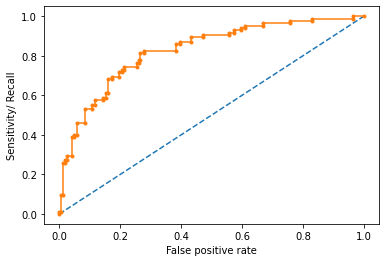

In [10]:
#Classification Area under curve
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=seed)
model = LogisticRegression()
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()

## Log Loss
Log Loss measures the performance of a classification model where the prediction input is a probability value between 0 and 1. Log loss increases as the predicted probability diverge from the actual label. The goal of any machine learning model is to minimize this value. As such, smaller log loss is better, with a perfect model having a log loss of 0.

In [11]:
#Classification LogLoss
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

warnings.filterwarnings('ignore')
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=seed)
model = LogisticRegression()
model.fit(X_train, y_train)
#predict and compute logloss
pred = model.predict(X_test)
accuracy = log_loss(y_test, pred)
print("Logloss: %.2f" % (accuracy))

Logloss: 7.89


## Kolomogorov Smirnov chart
K-S or Kolmogorov-Smirnov chart measures the performance of classification models. More accurately, K-S is a measure of the degree of separation between positive and negative distributions.

The K-S is 100 if the scores partition the population into two separate groups in which one group contains all the positives and the other all the negatives. On the other hand, If the model cannot differentiate between positives and negatives, then it is as if the model selects cases randomly from the population. The K-S would be 0.

In most classification models the K-S will fall between 0 and 100, and that the higher the value the better the model is at separating the positive from negative cases.

The K-S may also be used to test whether two underlying one-dimensional probability distributions differ. It is a very efficient way to determine if two samples are significantly different from each other.

In [12]:
from scipy.stats import kstest 
import random 
  
# N = int(input("Enter number of random numbers: ")) 
N = 10
  
actual =[] 
print("Enter outcomes: ") 
  
for i in range(N): 
    # x = float(input("Outcomes of class "+str(i + 1)+": ")) 
    actual.append(random.random()) 
  
print(actual) 
x = kstest(actual, "norm")    
print(x)

Enter outcomes: 
[0.6632947099640041, 0.48408882009609067, 0.16013005459368523, 0.5145874791931717, 0.42789809351642105, 0.7900004148453976, 0.830603462387187, 0.22832276986524014, 0.5925725251313937, 0.8256497488677509]
KstestResult(statistic=0.563610686748064, pvalue=0.0015893703163507536)


## Jaccard Similarity Score
Jaccard Index or Jaccard similarity coefficient is a statistic used in understanding the similarities between sample sets. The measurement emphasizes the similarity between finite sample sets and is formally defined as the size of the intersection divided by the size of the union of the two labeled sets.

In [13]:
import numpy as np

def compute_jaccard_similarity_score(x, y):
    intersection_cardinality = len(set(x).intersection(set(y)))
    union_cardinality = len(set(x).union(set(y)))
    return intersection_cardinality / float(union_cardinality)

score = compute_jaccard_similarity_score(np.array([0, 1, 2, 5, 6]), np.array([0, 2, 3, 5, 7, 9]))
print("Jaccard Similarity Score : %s" %score)

Jaccard Similarity Score : 0.375


# Summary
Now you know how to evaluate your model in terms of:
1) Accuracy: How accurate is your model predicting at an image.
2) Precision: How good is your model labelling something correct (The degree of exactness)
3) Recall: How well your model can recall the positive class.
4) F1 Score: Getting precision and recall at a single metric.
5) Discover other evaluation metrics - ROC, Log Loss, Kolomogorov Smirnov chart, Jaccard Similarity Score

# Contributors
Author
Pahvindran Raj